# Basic Image manipulation using Pillow (PIL)

In [1]:
from PIL import Image

In [2]:
img = Image.open("parrot.png")
print(img.mode)
print(img.height,img.width,img.size)
print(type(img))

RGBA
382 512 (512, 382)
<class 'PIL.PngImagePlugin.PngImageFile'>


In [3]:
#Resize
small_img = img.resize((300,200))
small_img.save("new.png")

In [4]:
#creating a thumbnail
img.thumbnail((300,200))    #thumbnail method does not return a new image(it just modifies current image)
img.save("new.png")

In [5]:
#Cropping image
img2 = img.crop((0,0,200,300))    #all other methods create a new image object
img2.save("cropped.png")

In [6]:
#pasting an image onto another image
imgcopy = img.copy()    
imgcopy.thumbnail((200,300))
img.paste(imgcopy,(50,50))
img.save("new2.png")

In [7]:
#Rotate (with edges getting cropped)
img = Image.open("parrot.png")
imgr = img.rotate(45)
imgr.save("rotated.png")

#rotate (with edges not getting cropped)
imgr2 = img.rotate(45, expand=True)
imgr2.save("rotated2.png")

In [8]:
#convert to grayscale
imggrey = img.convert("L")
imggrey.save("grey.png")

In [9]:
#computing basic statistics of an image
import PIL.ImageStat as stat
img = Image.open("parrot.png")
s = stat.Stat(img)
print(s.extrema)
print(s.count)
print(s.mean)

[(0, 253), (0, 255), (0, 250), (255, 255)]
[195584, 195584, 195584, 195584]
[123.16453288612566, 122.01323727912303, 66.95702102421465, 255.0]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (256,) and arg 1 with shape (512,).

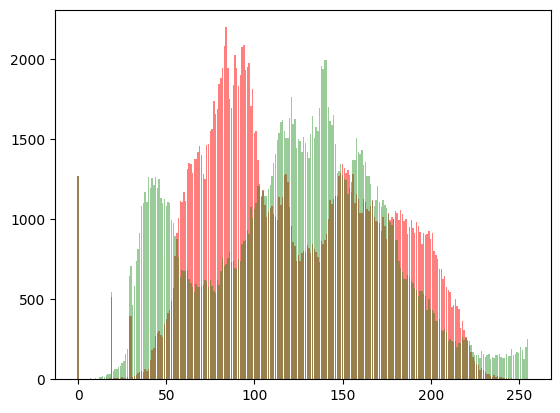

In [10]:
#Plotting the histograms of pixel values for the RGB channels of an image
from matplotlib import pyplot as plt
hist = img.histogram()
plt.bar(range(256), hist[:256], color='red',alpha=0.5)
plt.bar(range(256), hist[256:2*256], color='green',alpha=0.4)
plt.bar(range(256), hist[2*256:], color='blue',alpha=0.3)
plt.plot()

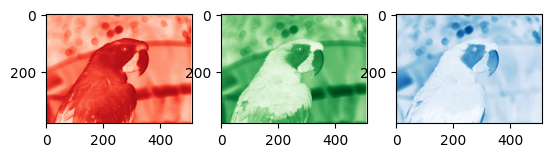

In [ ]:
#Separating the RGB channels of an image
img = Image.open("parrot.png")
ch_r, ch_g, ch_b, alpha = img.split()
plt.subplot(1,3,1)
plt.imshow(ch_r,cmap=plt.cm.Reds)
plt.subplot(1,3,2)
plt.imshow(ch_g, cmap=plt.cm.Greens)
plt.subplot(1,3,3)
plt.imshow(ch_b, cmap=plt.cm.Blues)

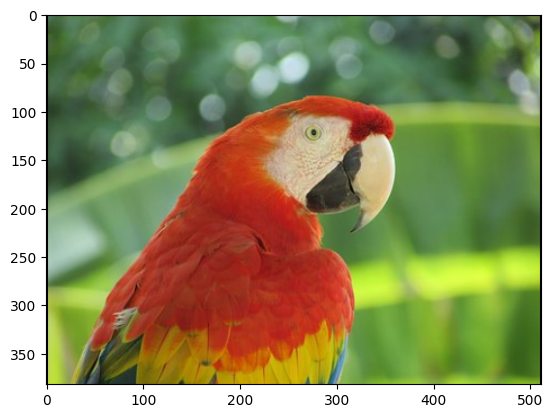

In [ ]:
#Combining multiple channels of an image
image = Image.merge('RGBA',(ch_r,ch_g,ch_b,alpha))
plt.imshow(image)

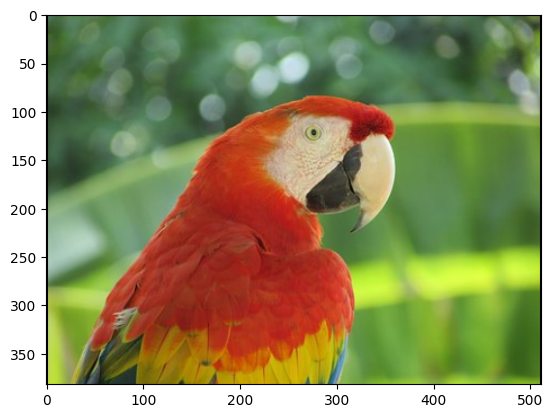

In [ ]:
image = Image.merge('RGB',(ch_r,ch_g,ch_b))
plt.imshow(image)